# Bayesian Neural Network Classification on IRIS dataset

In [1]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Iris Data

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
Y = iris.target 

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

In [7]:
x

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [8]:
#Train test split 
from sklearn.model_selection import train_test_split
X = x
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=41)

In [9]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [10]:
X_train.shape

torch.Size([120, 4])

In [11]:
X_test.shape

torch.Size([30, 4])

In [12]:
# Remove class 1 (out of classes 0, 1 and 2) from the train data 
X_train_filtered = X_train[y_train!=1]
X_train_filtered.shape

torch.Size([81, 4])

In [13]:
y_train_filtered = y_train[y_train!=1]
y_train_filtered.shape

torch.Size([81])

## 2. Define Model

In [ ]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.5, in_features=4, out_features=8),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.5, in_features=8, out_features=9),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=1, in_features=9, out_features=3),
    # nn.LogSoftmax(dim=1)
)

# model = nn.Sequential(
#     nn.Linear(in_features=4, out_features=8),
#     nn.ReLU(),
#     nn.Linear(in_features=8, out_features=9),
#     nn.ReLU(),
#     nn.Linear(in_features=9, out_features=3),
#     nn.Softmax(dim=1)
# )

In [15]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)

optimizer = optim.Adam(model.parameters(), lr=0.01)

## 3. Train Model

In [16]:
kl_weight = 0.0
filter_train = False

In [ ]:
filtered_indices = [i for (i, label) in enumerate(y_train) if label!=1]
X_train_filtered = X_train[torch.tensor(filtered_indices)]
y_train_filtered = y_train[torch.tensor(filtered_indices)]

In [68]:
len(filtered_indices)

81

In [63]:
y_train_filtered

tensor([2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
        0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2,
        2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0,
        2, 0, 0, 2, 2, 2, 2, 0, 2])

In [79]:
#Train the model only on classes 0 and 2
for step in range(1000):
    pre = model(X_train_filtered)
    ce = ce_loss(pre, y_train_filtered)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y_train_filtered.size(0)
correct = (predicted == y_train_filtered).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

KeyboardInterrupt: 

## 4. Test Model

In [46]:
# Sample 10k models and store the results
n_models = 10000
models_result = [model(X_test) for k in range(n_models)]

In [47]:
models_result[0][0].argmax().item()

2

In [48]:
results = np.zeros((n_models, 30))     # num. of models, number of test datapoints
for i in range(n_models):
    for j in range(30):
        results[i][j] = models_result[i][j].argmax().item()

In [25]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

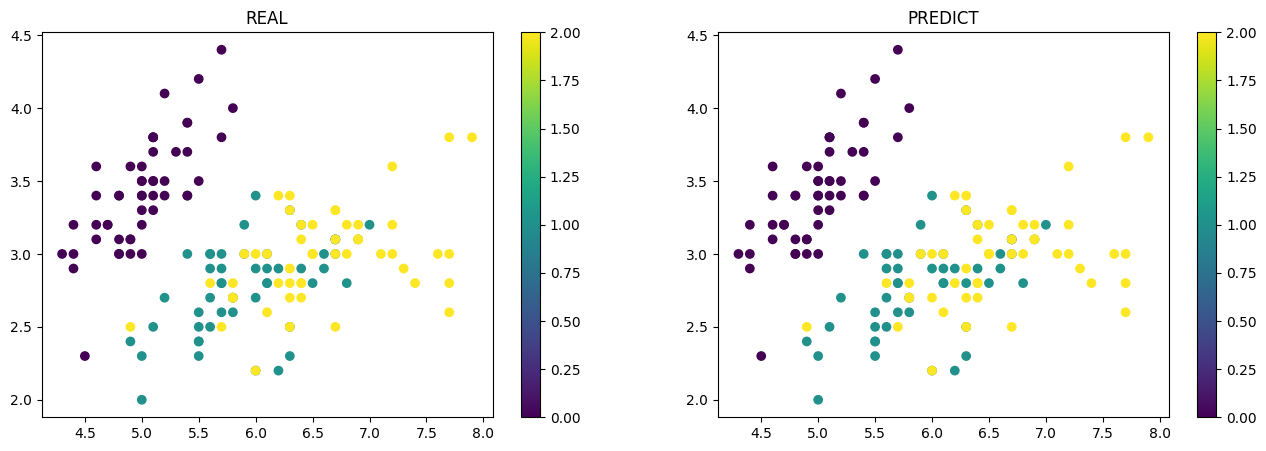

In [26]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

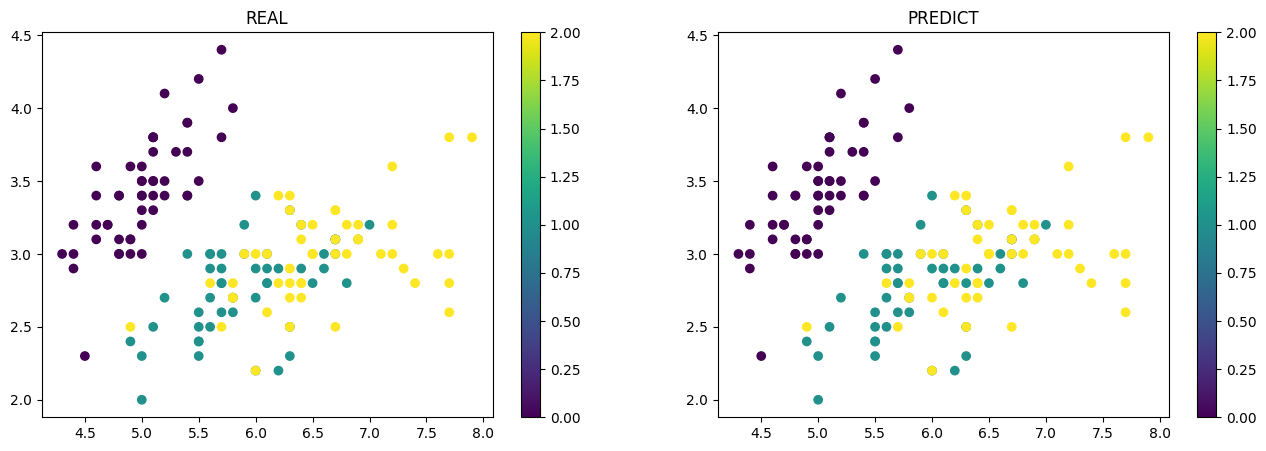

In [27]:
# Bayesian Neural Network will return different outputs even if inputs are same.
# In other words, different plots will be shown every time forward method is called.
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

## Within sample mean and variation 

In [29]:
X_test

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [30]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

# Unseen class 

In [50]:
filtered_indices_unseen = [i for (i, label) in enumerate(y_test) if label==1]
X_test_filtered = X_test[torch.tensor(filtered_indices_unseen)]
y_test_filtered = y_test[torch.tensor(filtered_indices_unseen)]

In [56]:
n_models = 1000
samples = torch.zeros((n_models, len(y_test_filtered), 3))

for i in range(n_models) :
  print("\r", "\tTest run {}/{}".format(i+1, n_models), end="")

  samples[i,:,:] = model(X_test_filtered)

 	Test run 1000/1000

In [57]:
withinSampleMean = torch.mean(samples, dim=0)
samplesMean = torch.mean(samples, dim=(0,1))

withinSampleStd = torch.sqrt(torch.mean(torch.var(samples, dim=0), dim=0))
acrossSamplesStd = torch.std(withinSampleMean, dim=0)

print("")
print("Class prediction analysis:")
print("\tMean class probabilities:")
print(samplesMean)
print("\tPrediction standard deviation per sample:")
print(withinSampleStd)
print("\tPrediction standard deviation across samples:")
print(acrossSamplesStd)


Class prediction analysis:
	Mean class probabilities:
tensor([ 3.6499, 18.8427, -8.3183], grad_fn=<MeanBackward1>)
	Prediction standard deviation per sample:
tensor([0., 0., 0.], grad_fn=<SqrtBackward0>)
	Prediction standard deviation across samples:
tensor([4.8371, 9.1441, 9.4980], grad_fn=<StdBackward0>)


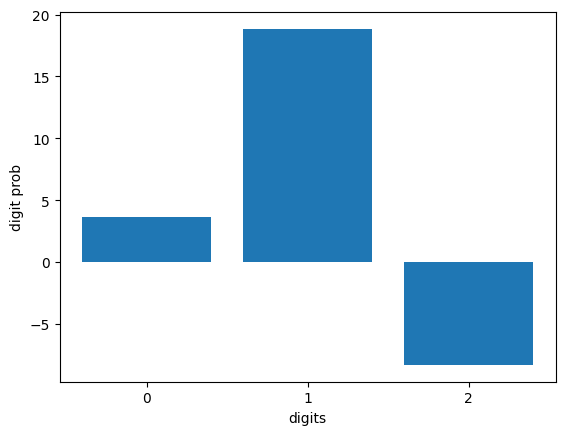

In [62]:
plt.figure("Unseen class probabilities")
plt.bar(np.arange(3), samplesMean.detach().numpy())
plt.xlabel('digits')
plt.ylabel('digit prob')
# plt.ylim([0,1])
plt.xticks(np.arange(3))
plt.show()

# Seen 

In [64]:
filtered_indices_seen = [i for (i, label) in enumerate(y_test) if label==0]
X_test_filtered = X_test[torch.tensor(filtered_indices_seen)]
y_test_filtered = y_test[torch.tensor(filtered_indices_seen)]

In [65]:
n_models = 1000
samples = torch.zeros((n_models, len(y_test_filtered), 3))

for i in range(n_models) :
  print("\r", "\tTest run {}/{}".format(i+1, n_models), end="")

  samples[i,:,:] = model(X_test_filtered)

 	Test run 1000/1000

In [66]:
withinSampleMean = torch.mean(samples, dim=0)
samplesMean = torch.mean(samples, dim=(0,1))

withinSampleStd = torch.sqrt(torch.mean(torch.var(samples, dim=0), dim=0))
acrossSamplesStd = torch.std(withinSampleMean, dim=0)

print("")
print("Class prediction analysis:")
print("\tMean class probabilities:")
print(samplesMean)
print("\tPrediction standard deviation per sample:")
print(withinSampleStd)
print("\tPrediction standard deviation across samples:")
print(acrossSamplesStd)


Class prediction analysis:
	Mean class probabilities:
tensor([ 45.2209,  23.7816, -46.8398], grad_fn=<MeanBackward1>)
	Prediction standard deviation per sample:
tensor([0., 0., 0.], grad_fn=<SqrtBackward0>)
	Prediction standard deviation across samples:
tensor([2.9262, 1.4648, 3.0071], grad_fn=<StdBackward0>)


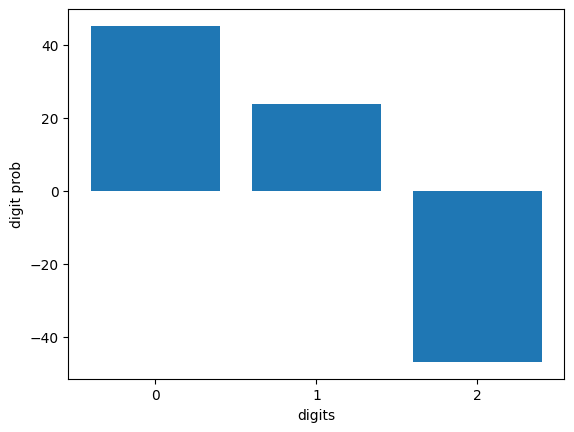

In [67]:
plt.figure("Seen class probabilities")
plt.bar(np.arange(3), samplesMean.detach().numpy())
plt.xlabel('digits')
plt.ylabel('digit prob')
# plt.ylim([0,1])
plt.xticks(np.arange(3))
plt.show()